In [1]:
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

In [2]:
my_data = pd.read_csv("diabetes.csv", delimiter=",")
my_data[0:5]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
X=my_data.loc[:,my_data.columns!='Outcome']
Y=my_data['Outcome']
Y=Y.replace(1,'Yes')
Y=Y.replace(0,'No')
Y

0      Yes
1       No
2      Yes
3       No
4      Yes
      ... 
763     No
764     No
765     No
766    Yes
767     No
Name: Outcome, Length: 768, dtype: object

In [4]:
from sklearn.model_selection import train_test_split
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, Y, test_size=0.15, random_state=6)

In [5]:
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
drugTree # it shows the default parameters
drugTree.fit(X_trainset,y_trainset)
predTree = drugTree.predict(X_testset)
print (predTree [0:5])
print (y_testset [0:5])

['No' 'No' 'No' 'No' 'No']
239     No
243    Yes
764     No
122     No
33      No
Name: Outcome, dtype: object


In [6]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  0.7586206896551724


In [7]:
from  io import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

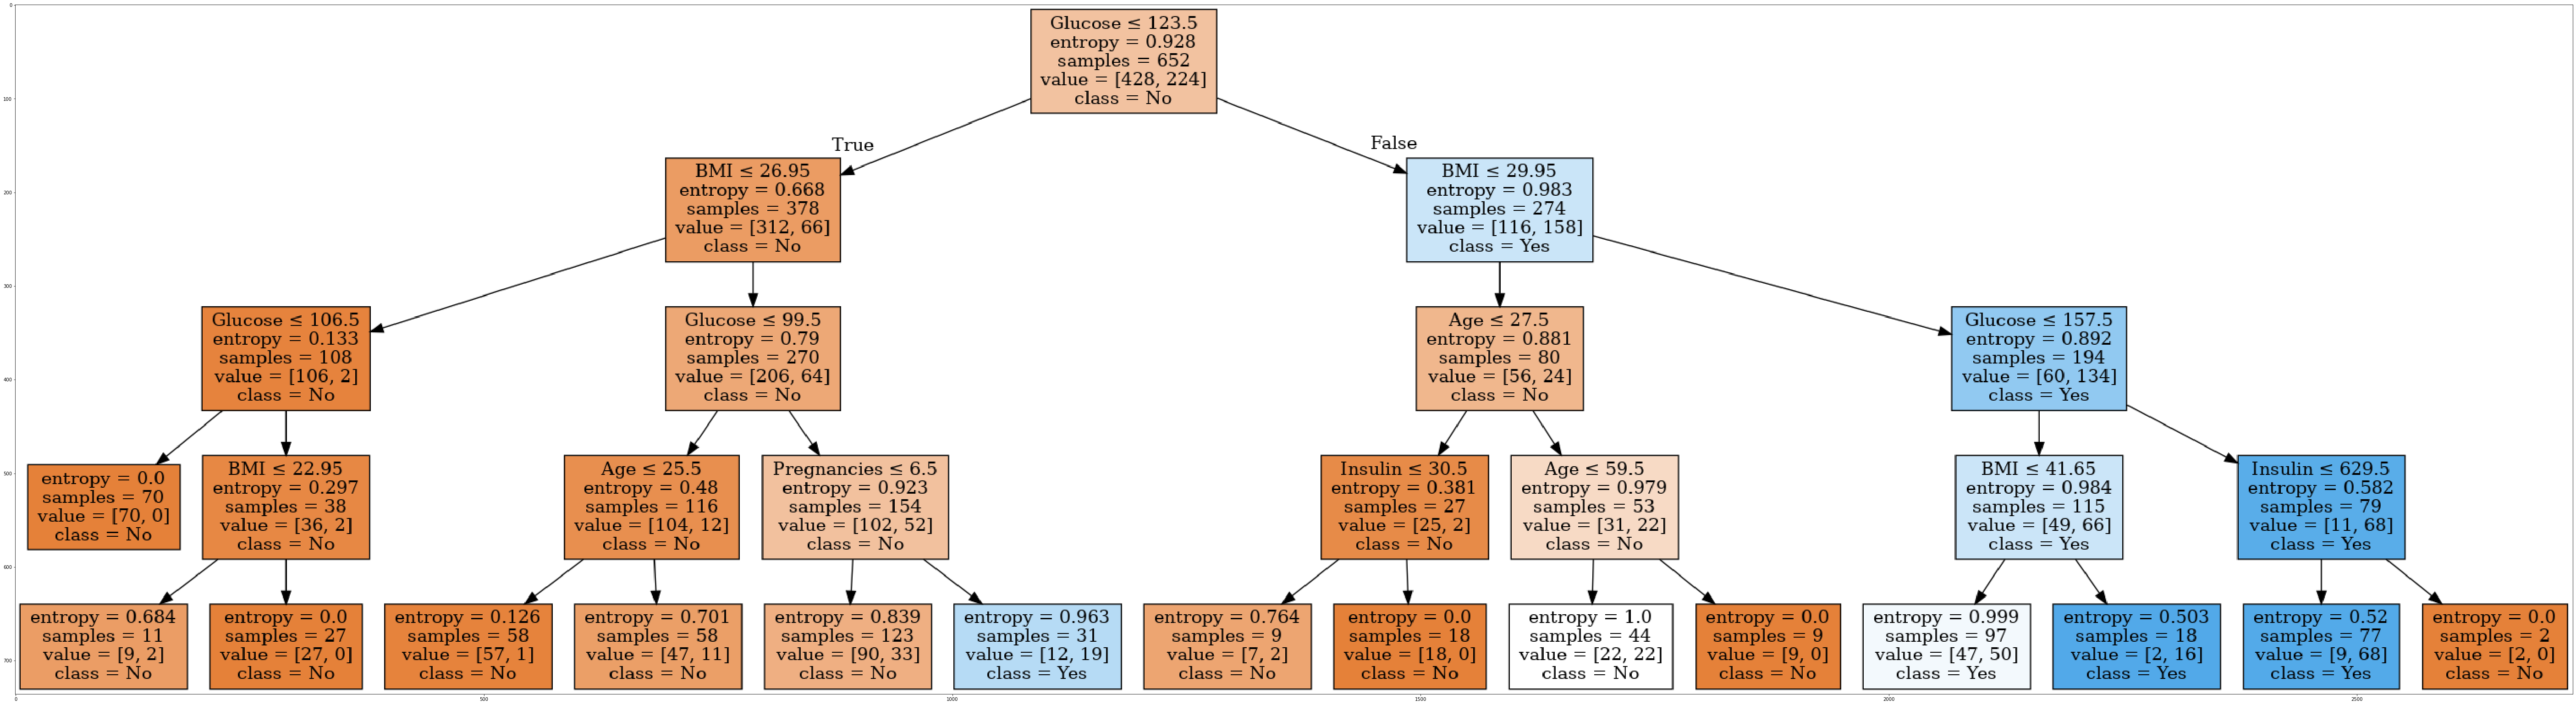

In [8]:
dot_data = StringIO()
filename = "drugtree.png"
featureNames = my_data.columns[0:8]
out=tree.export_graphviz(drugTree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_trainset), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')